In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir('/home/esther/Desktop/BehavioralTraining/code')

from preprocessingFunctions import loadData
from preprocessingFunctions import preProcessChoices
from preprocessingFunctions import preProcessReactionTimes
from preprocessingFunctions import makeSideChoices
from preprocessingFunctions import removeCancelledTrials

from strategyFunctions import simulateStrategies

from scoringFunctions import scorePerPhase
from scoringFunctions import scoreStrategy
from scoringFunctions import scoreChoicesUnfiltered
from scoringFunctions import calcNormStratScores

from plottingFunctions import plotIt
from plottingFunctions import plotNormScoresScatter

from rtDistFunctions import computeDensityForStrategy

In [3]:
os.chdir('/home/esther/Desktop/BehavioralTraining')

In [4]:
#%% load data
Adat,Mdat = loadData()

In [48]:
#%% PREPROCESS DATA (get sides and choices)
choices, sides = preProcessChoices(Adat, Mdat)

#%% join dataframes to feed into simulation loop
sideChoices = makeSideChoices(sides,choices)

In [6]:
WinStay, WinShift, Alt = simulateStrategies(sideChoices)

# Actual Scores
*Daily scores of the animals over the course of training*

In [7]:
Scores = scorePerPhase(Adat,Mdat)

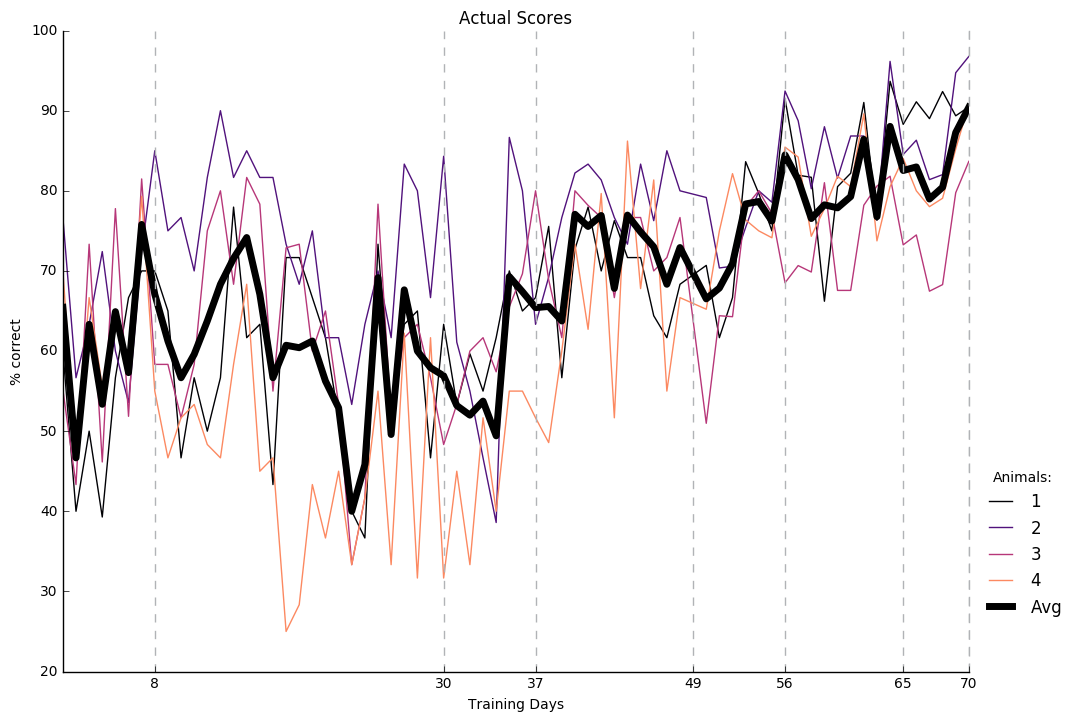

In [8]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

## Strategy Scores
_How the animals would have scored had they applied these strategies_

### Win-Stay Scores

In [9]:
winStayScores = scoreStrategy(WinStay,sides)

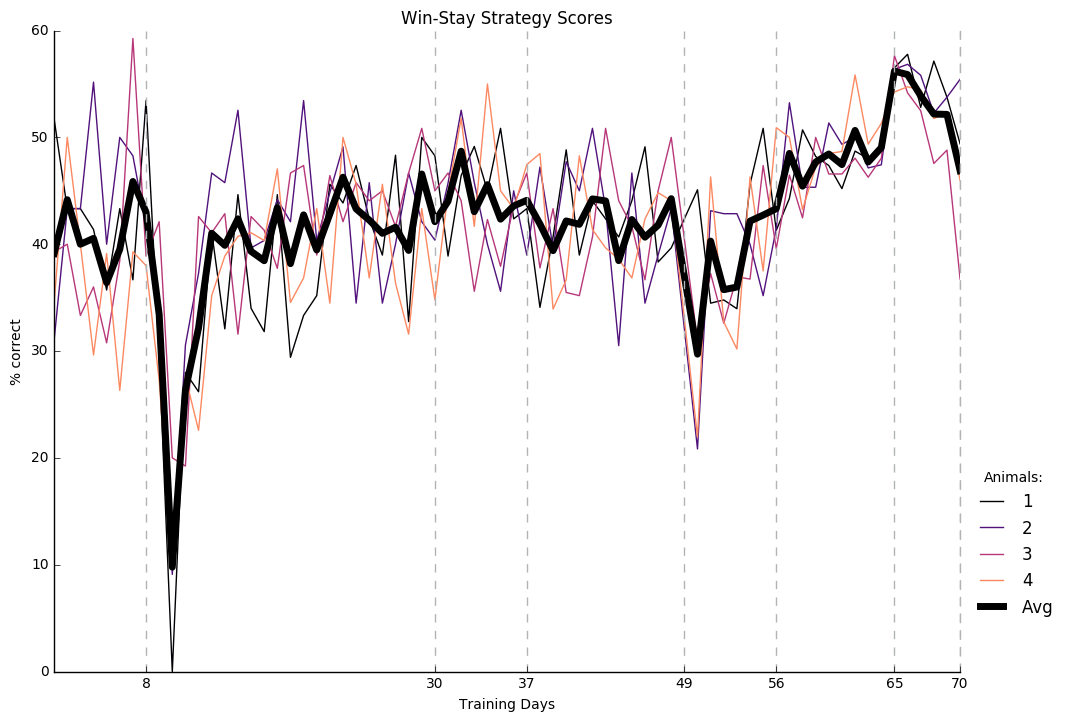

In [10]:
plotIt(winStayScores, title = "Win-Stay Strategy Scores", ylabel = "% correct", Phase = False, Norm = False)

### Win-Shift Scores

In [11]:
# calculate score if rat had used purely a win-shift strategy (same randomization)
winShiftScores = scoreStrategy(WinShift,sides)

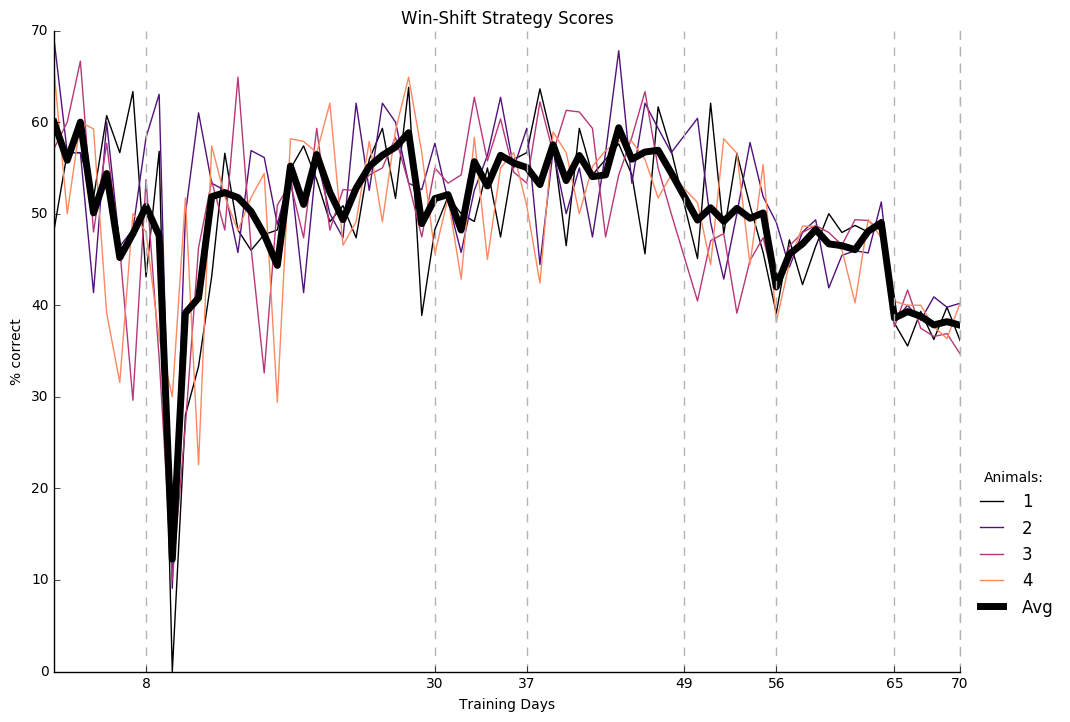

In [12]:
plotIt(winShiftScores, title = "Win-Shift Strategy Scores", ylabel = "% correct", Phase = False, Norm = False)

### Alternation Scores

In [13]:
# calculate score if rat had used purely an alternation strategy (same randomization)
altScores = scoreStrategy(Alt,sides)

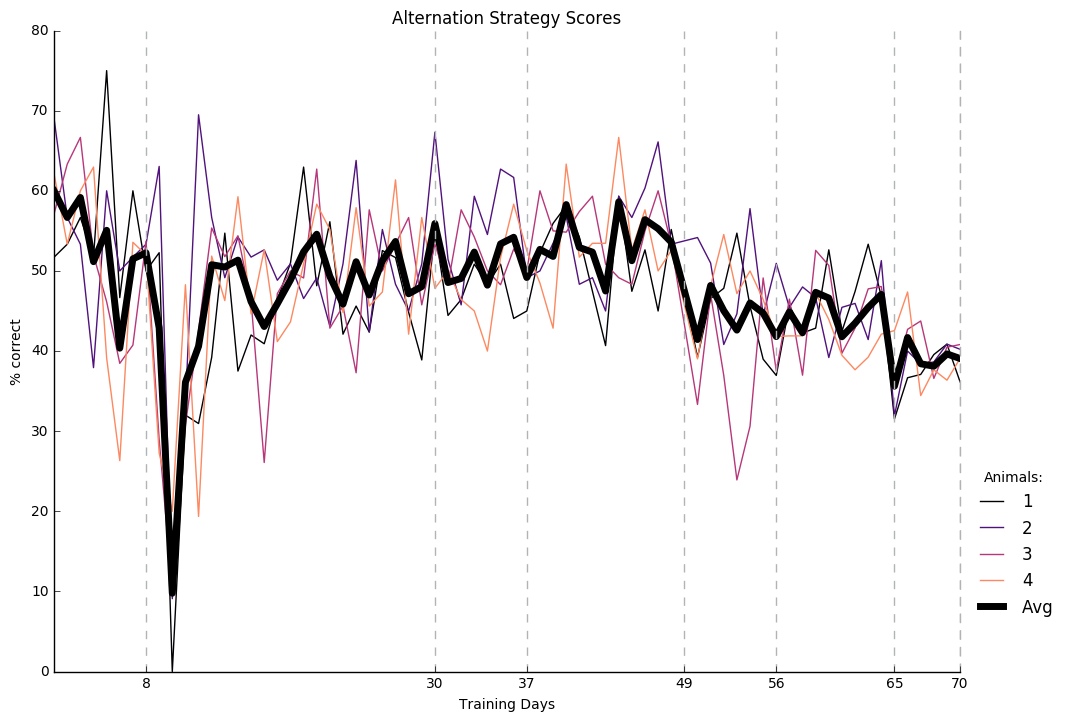

In [14]:
plotIt(altScores, title = "Alternation Strategy Scores", ylabel = "% correct", Phase = False, Norm = False)

# Animal Scores On Use Of Strategies
*Score strategy against animals choices, to what degree do the animals choices overlap with the strategies?*

### Win-Stay Overlap

In [15]:
# calculate score if rat had used purely a win-shift strategy (same randomization)
winStayOverlap = scoreStrategy(WinStay,choices)

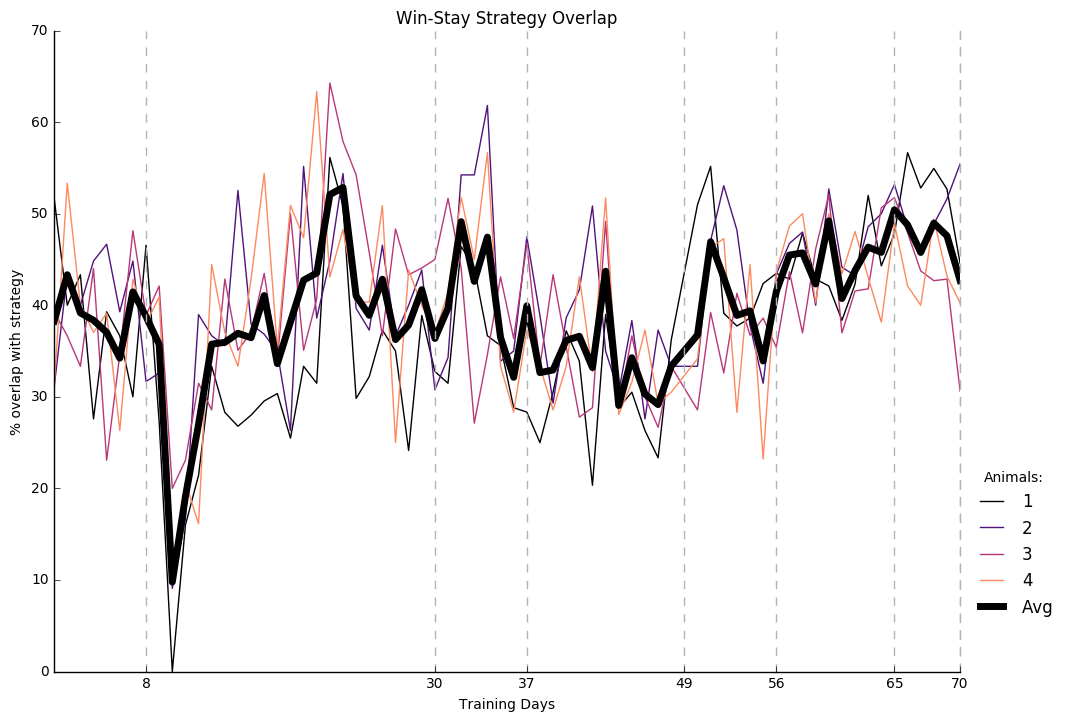

In [16]:
plotIt(winStayOverlap, title = "Win-Stay Strategy Overlap", ylabel = "% overlap with strategy", Phase = False, Norm = False)

### Win-Shift Overlap

In [17]:
# calculate score if rat had used purely a win-shift strategy (same randomization)
winShiftOverlap = scoreStrategy(WinShift,choices)

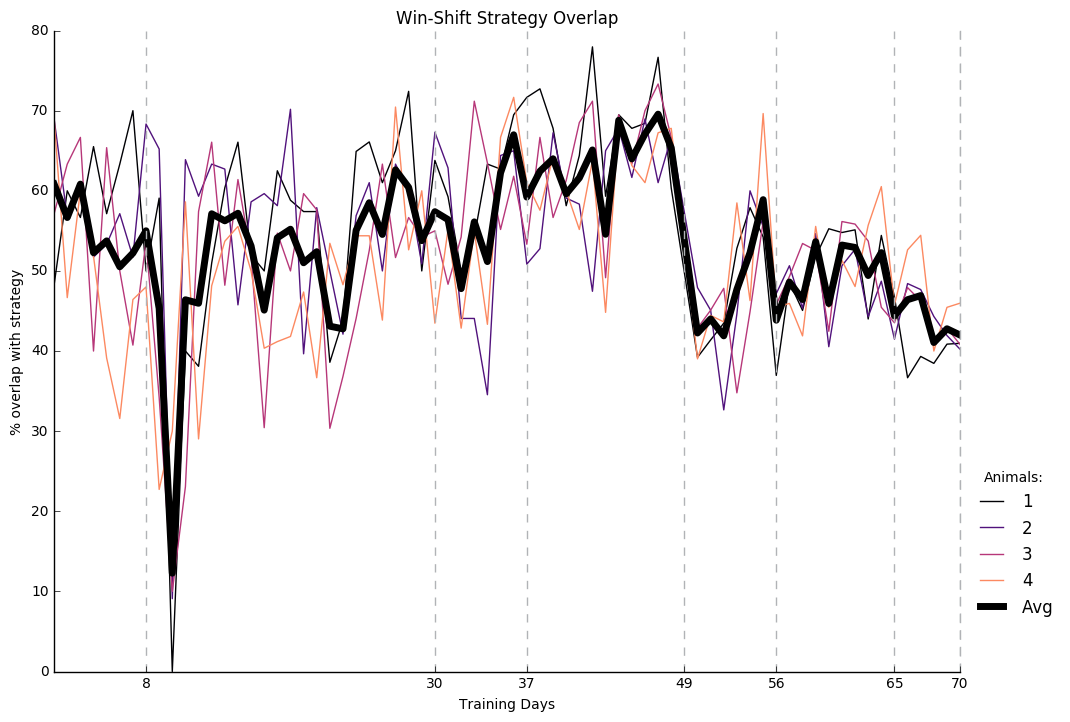

In [18]:
plotIt(winShiftOverlap, title = "Win-Shift Strategy Overlap", ylabel = "% overlap with strategy", Phase = False, Norm = False)

### Alternation Overlap

In [19]:
# calculate overlap between animal choices and alternation strategy
altOverlap = scoreStrategy(Alt,choices)

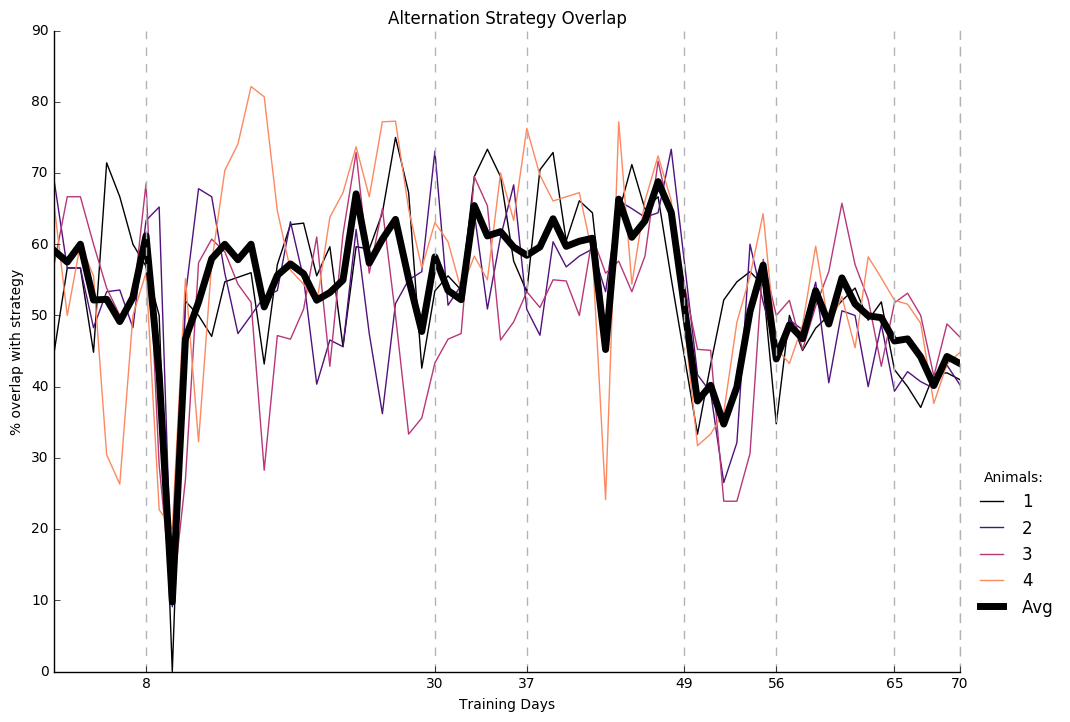

In [20]:
plotIt(altOverlap, title = "Alternation Strategy Overlap", ylabel = "% overlap with strategy", Phase = False, Norm = False)

# Reaction Times

In [21]:
# get all reaction times
rt = Adat.xs('reaction_time',level = 1, axis = 1)

# remove cancelled trials
rt = removeCancelledTrials(rt,Mdat)

# only include trials faster than 100ms
rtFiltered = rt[rt>100]

## Win-Stay Strategy

**Compare WinStay simulation (calculated based on the same randomization that the rat received in the actual trials) to the choices the rat made to determine which of these choices can be marked as trials where a winstay strategy was used. the scoreChoicesUnfiltered function is also used in the scoreStrategy function (only in scoreStrategy the results of scoreChoicesUnfiltered are then scored per day.  **

In [22]:
strategyAppliedWinStay, strategyNotAppliedWinStay, nTotalTrials = scoreChoicesUnfiltered(WinStay,choices)

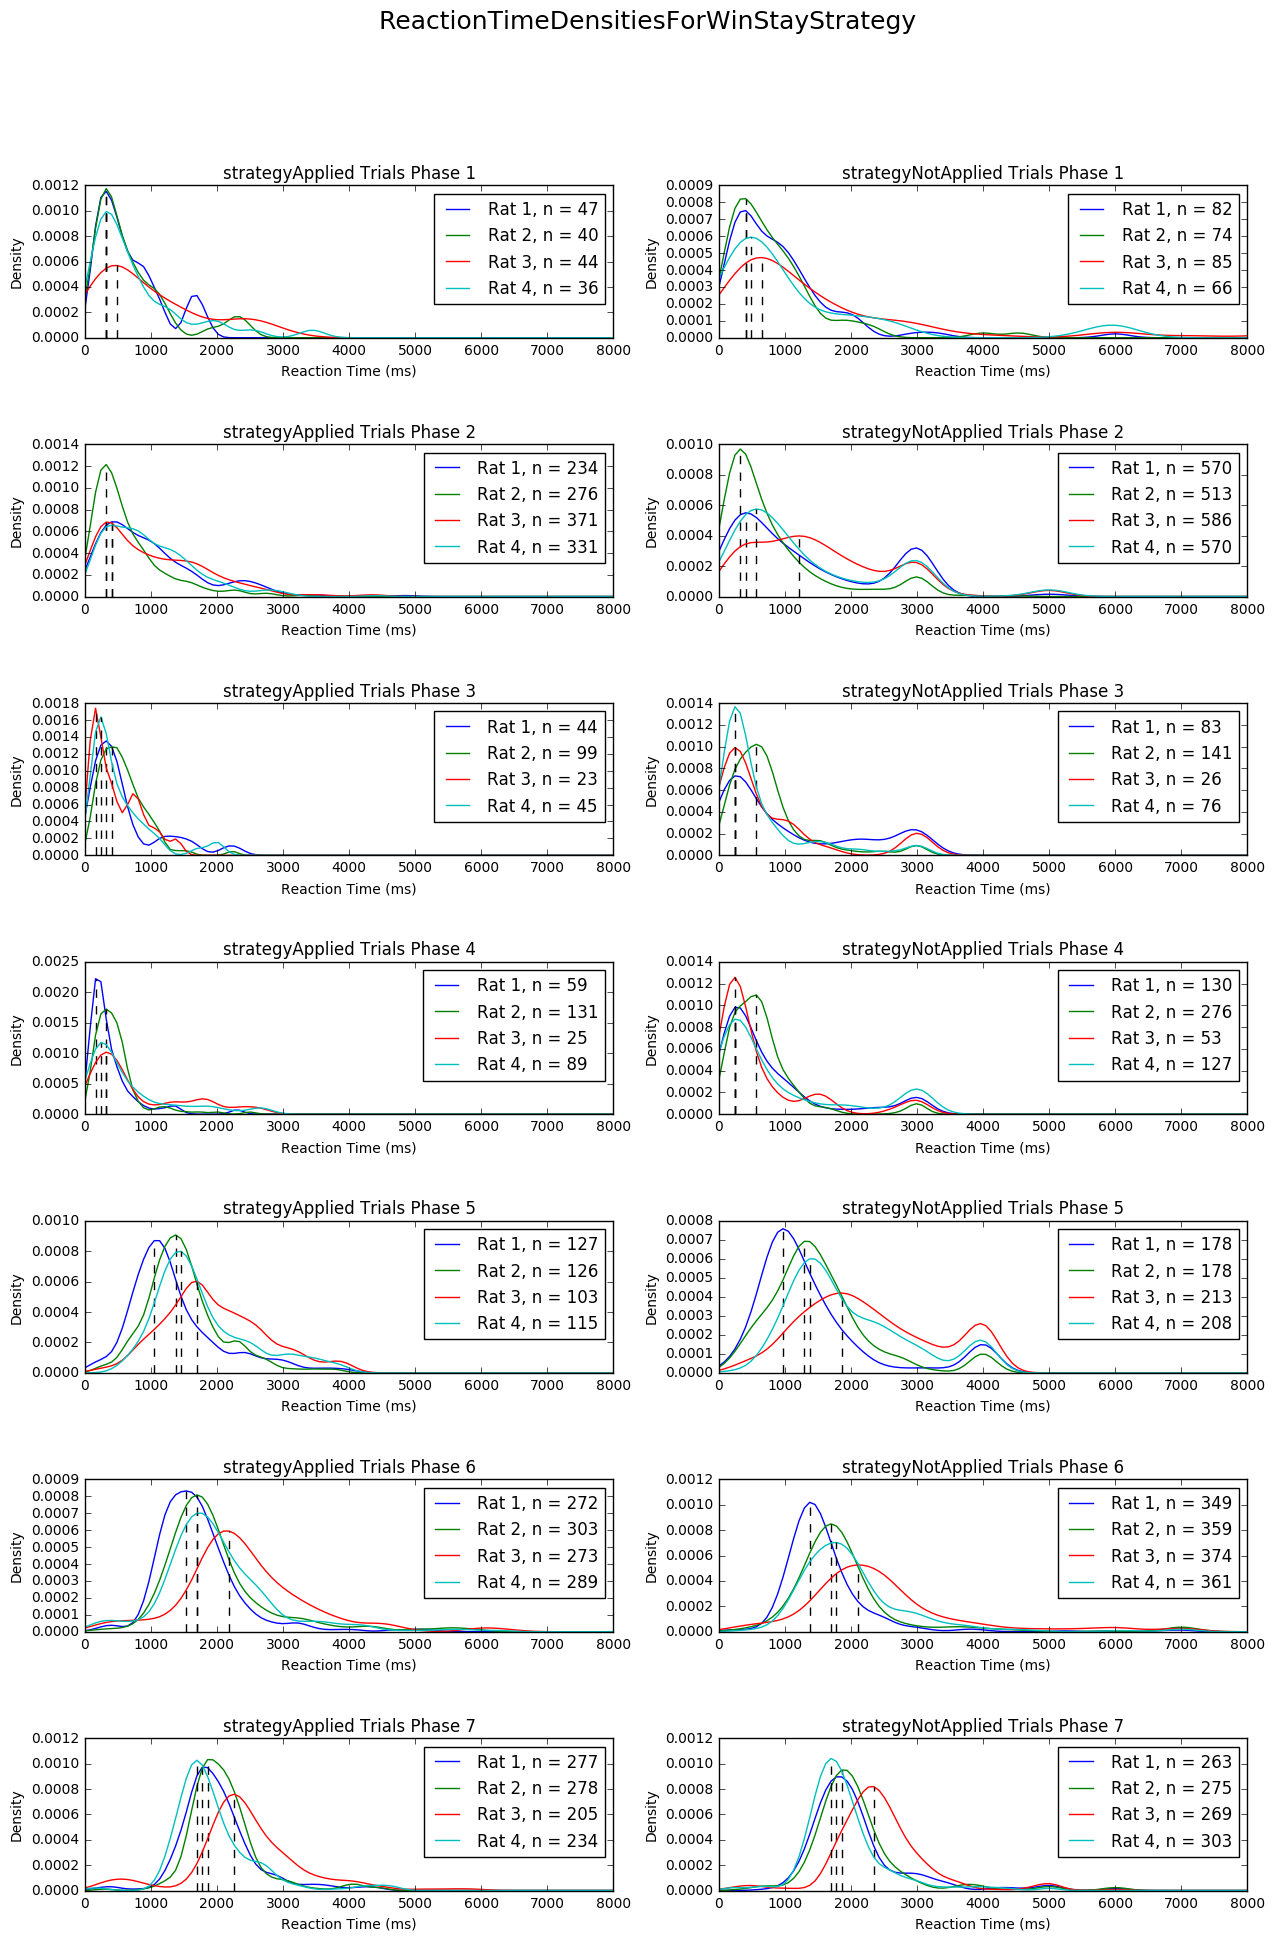

In [23]:
computeDensityForStrategy(rtFiltered, strategyAppliedWinStay, strategyNotAppliedWinStay, figname = "ReactionTimeDensitiesForWinStayStrategy", mode = True)

## Win-Shift Strategy

In [24]:
strategyAppliedWinShift, strategyNotAppliedWinShift, nTotalTrials = scoreChoicesUnfiltered(WinShift,choices)

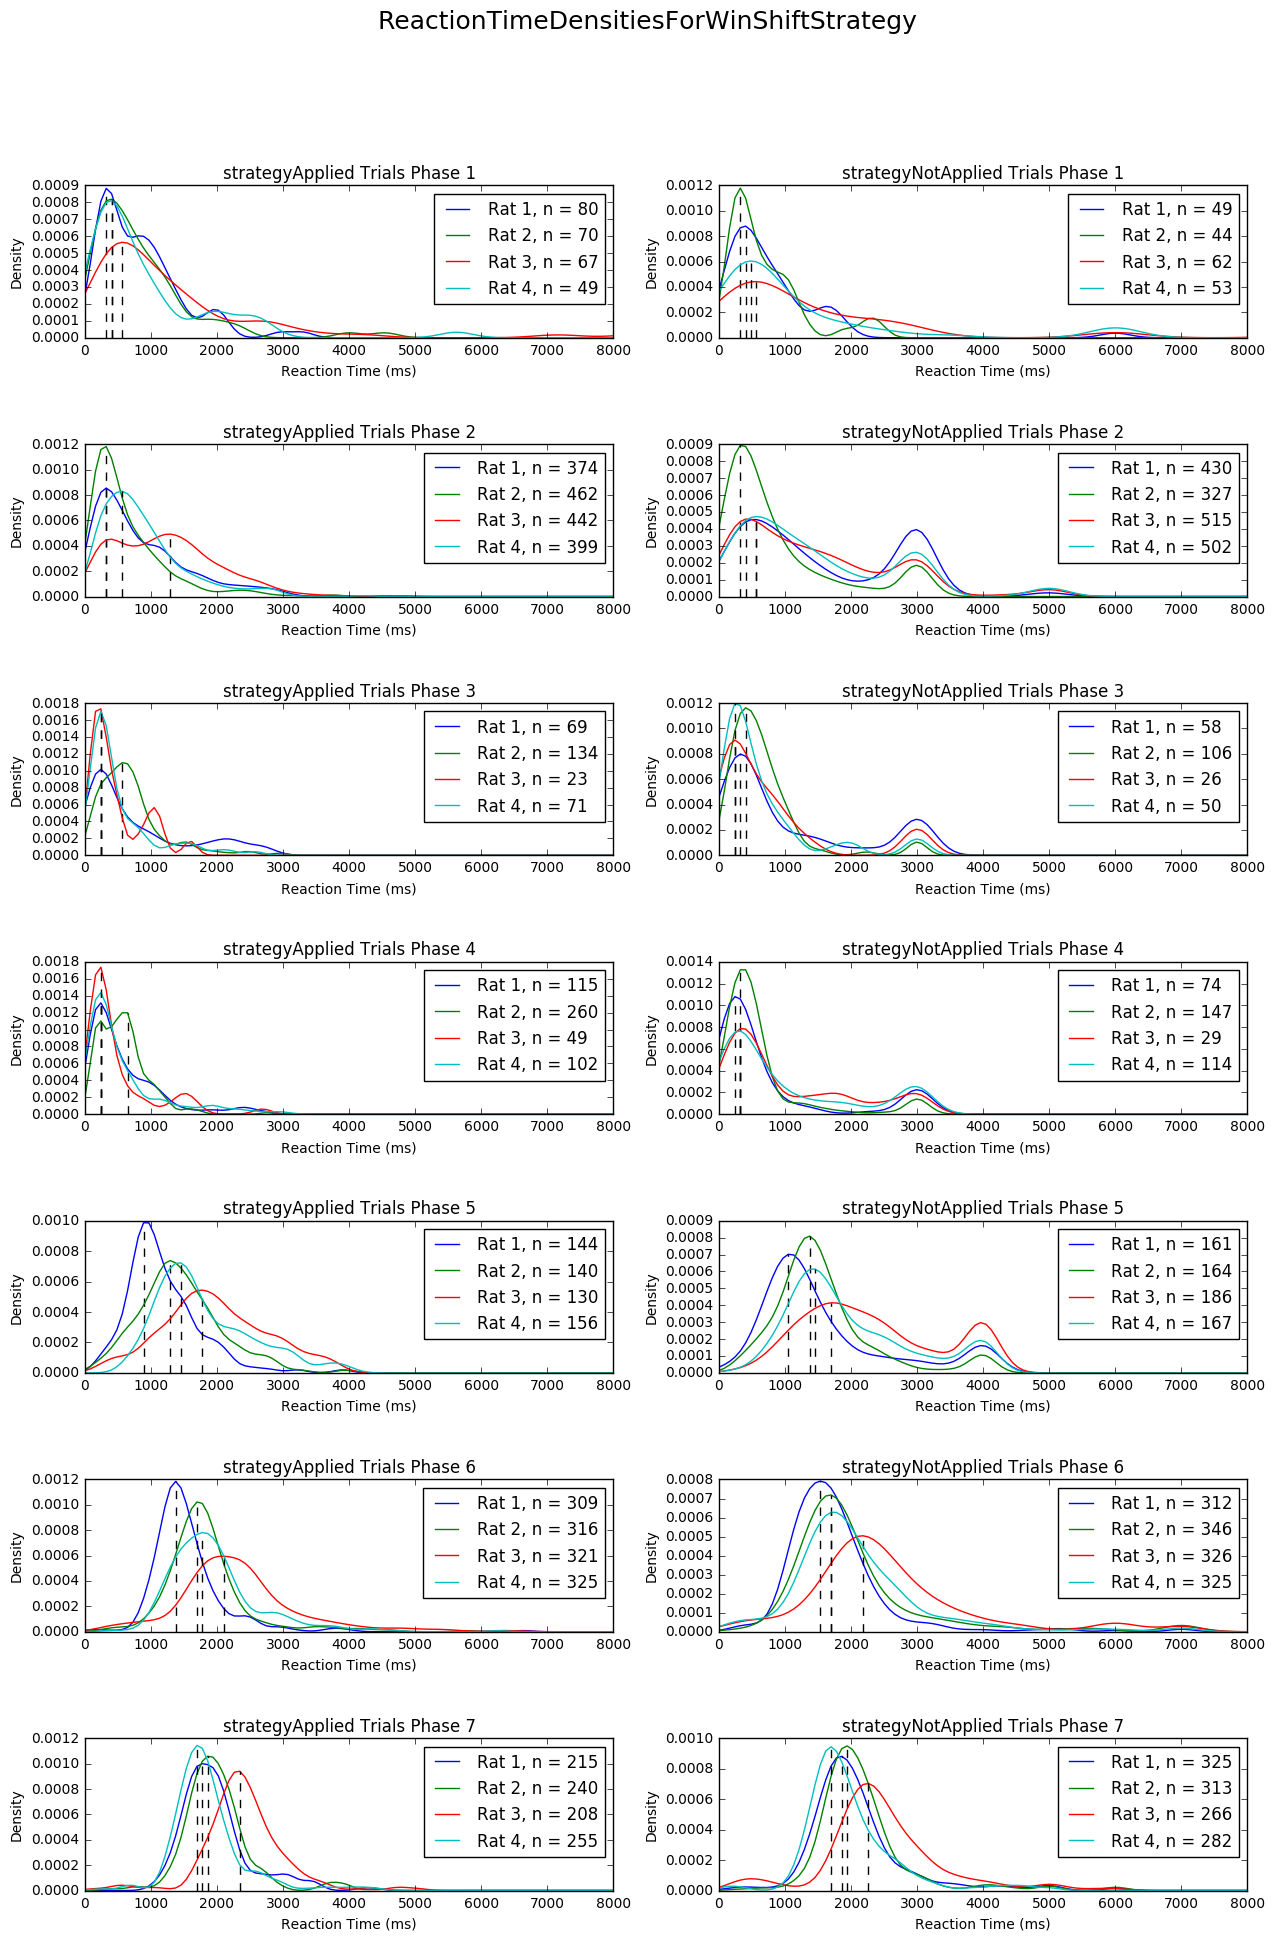

In [25]:
computeDensityForStrategy(rtFiltered, strategyAppliedWinShift, strategyNotAppliedWinShift, figname = "ReactionTimeDensitiesForWinShiftStrategy", mode = True)

## Alternation Strategy

In [26]:
strategyAppliedAlt, strategyNotAppliedAlt, nTotalTrials = scoreChoicesUnfiltered(Alt,choices)

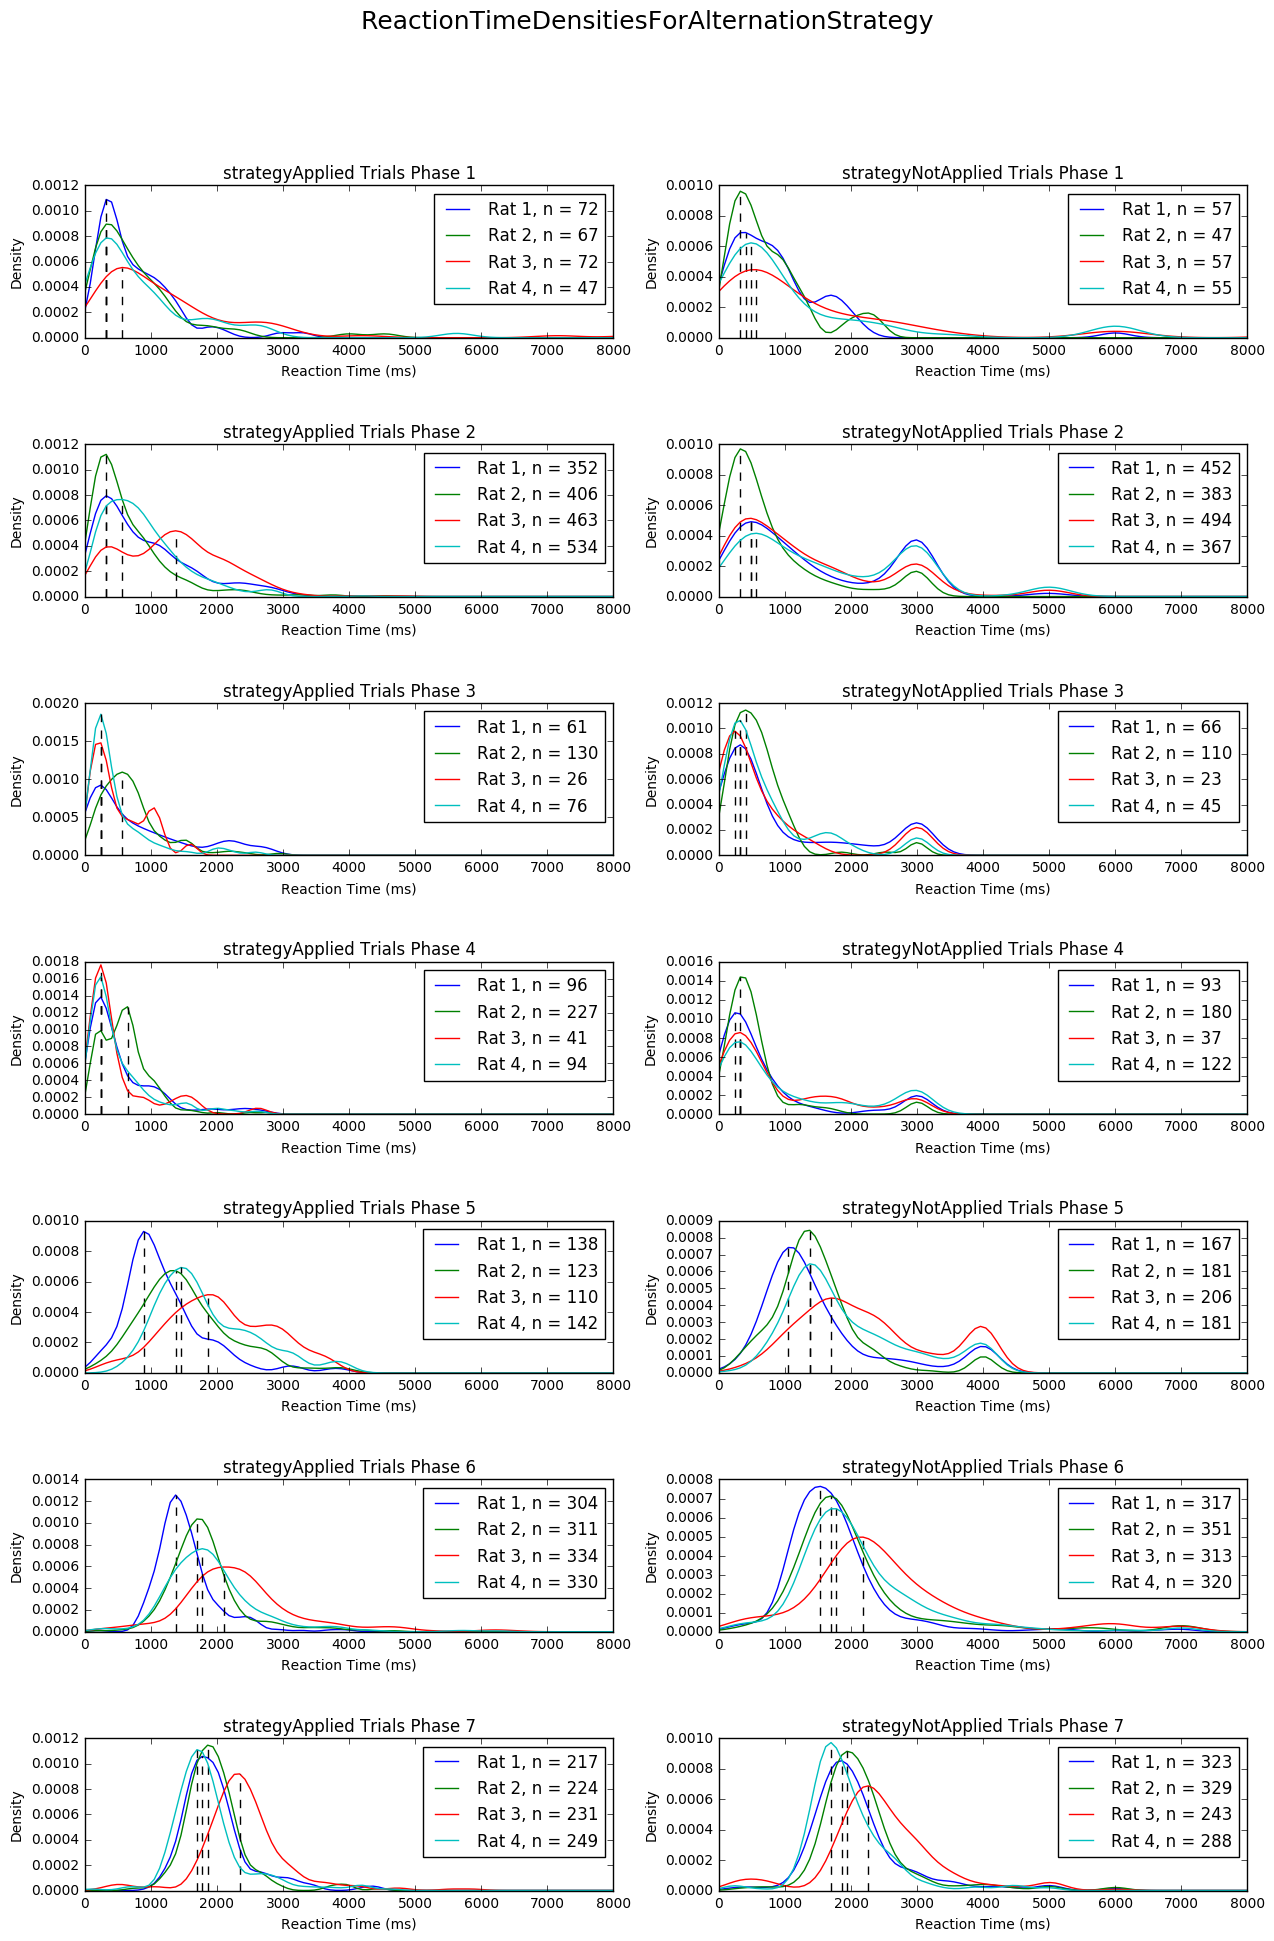

In [27]:
computeDensityForStrategy(rtFiltered, strategyAppliedAlt, strategyNotAppliedAlt, figname = "ReactionTimeDensitiesForAlternationStrategy", mode = True)

** I've come to the conclusion that I'll leave out the reaction times of the strategies, they don't say much, and moreover since I only look back one trial (to determine what the win-stay and win-shift simulation does, it's not enough to say that the animal really was applying a particular strategy, it's better to look multiple trials back and see if there's a pattern in the behavior, but still since the animal only has two choices the chance is large that even though the trial could be classified as a particular strategy there's also a large (50%) chance that it's not. **

** What I mostly wanted to see is if that second peak was caused by any of the strategies, and clearly it does not seem to be. This is to be expected actually, when the animal is applying a strategy he's often certain of himself and doesn't hesitate, the first peak in the incorrect trials is likely when the animal thinks he's correct (but actually isn't) and the second one is where he isn't sure and hesitates. **

# Normalized Scores

## Win-Stay

In [28]:
stratScoreAnimal,stratScoreRand,normWinStayScore = calcNormStratScores(WinStay,sides,choices)

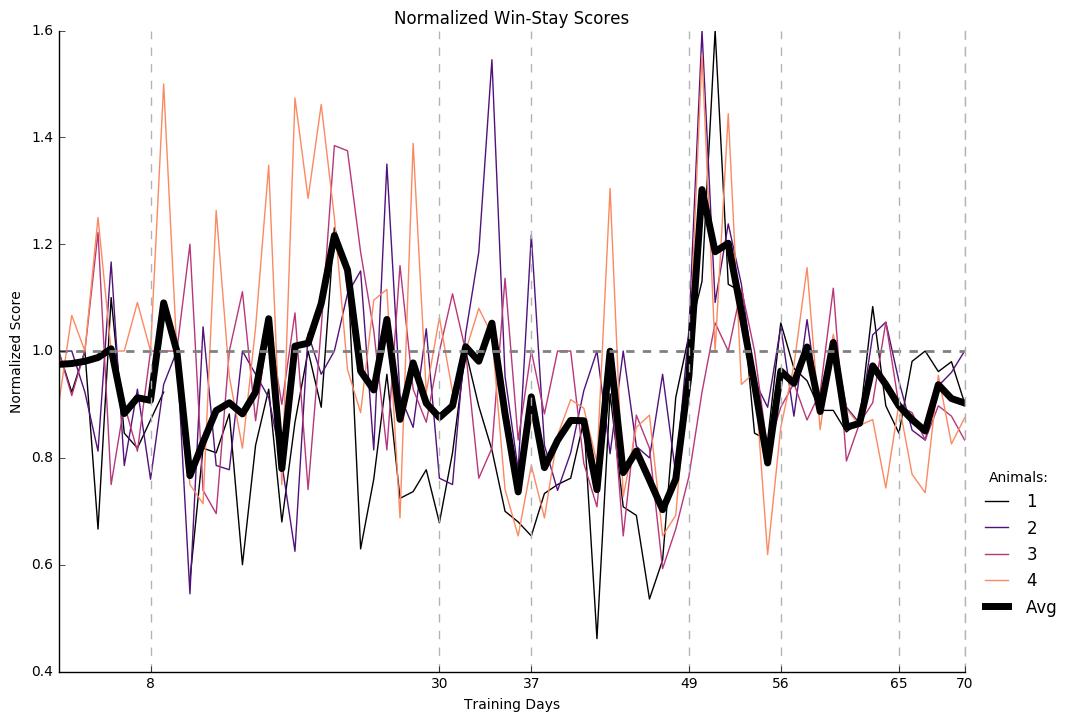

In [29]:
plotIt(normWinStayScore, "Normalized Win-Stay Scores", ylabel = "Normalized Score", Norm = True )

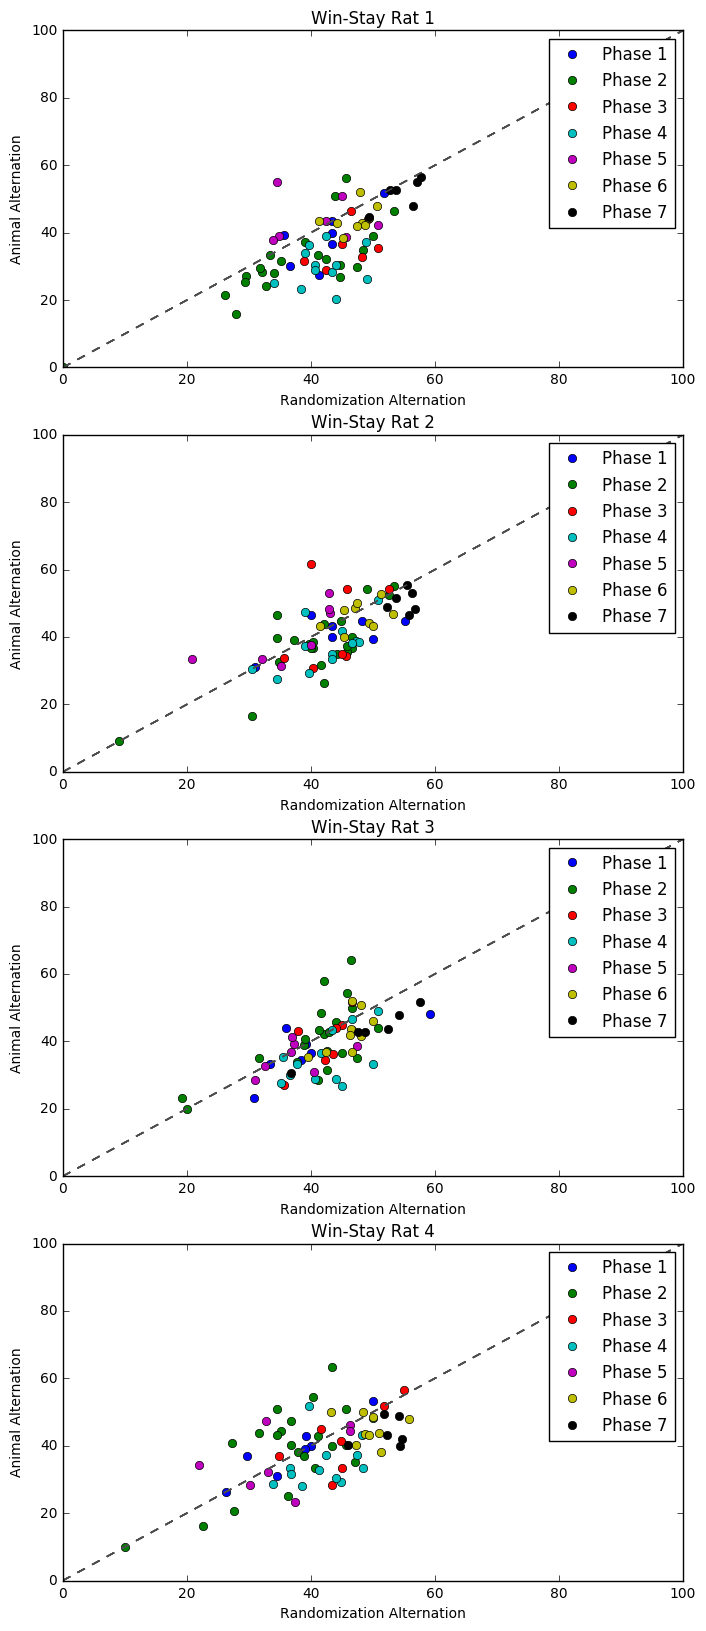

In [30]:
plotNormScoresScatter(stratScoreAnimal,stratScoreRand, "Win-Stay")

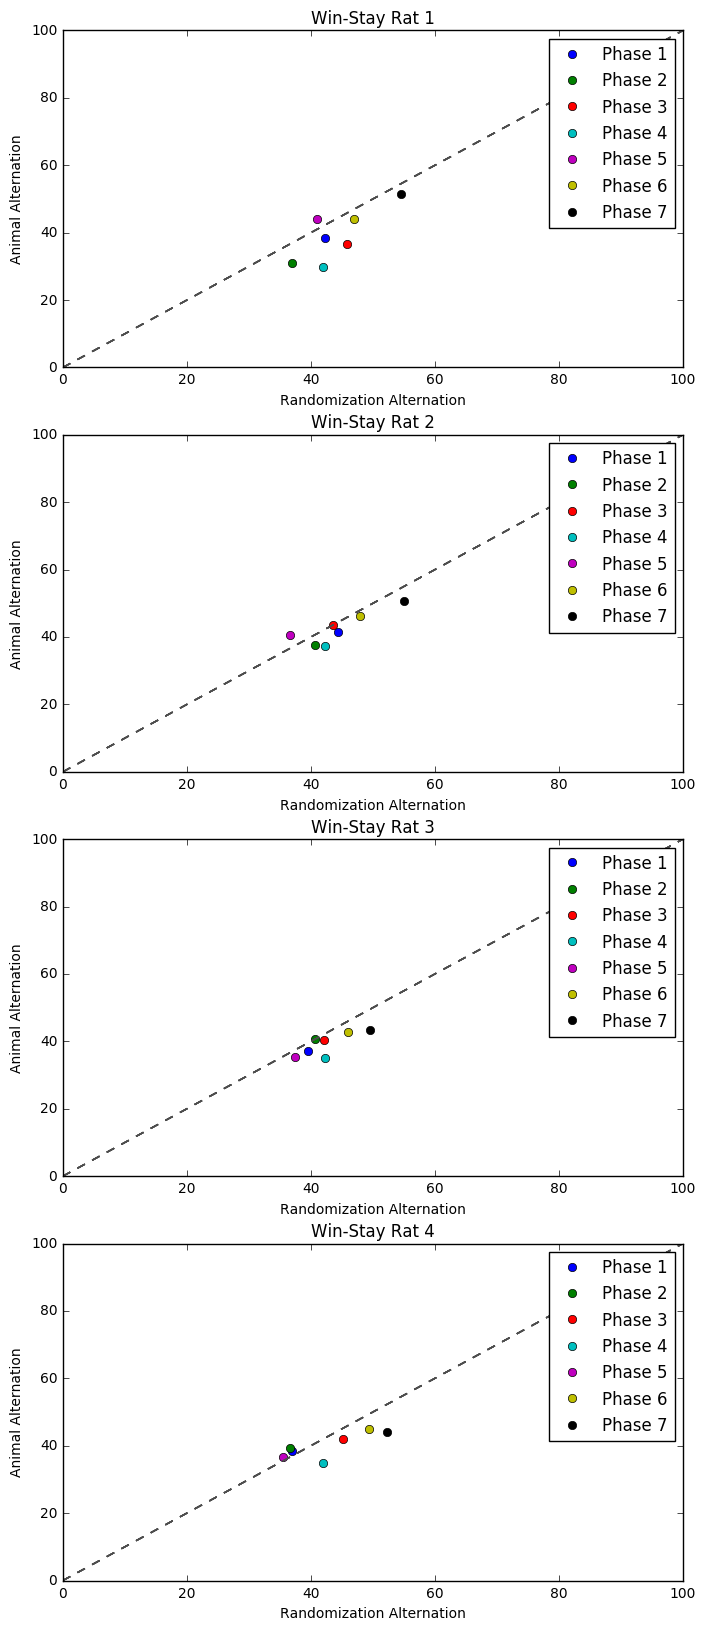

In [31]:
plotNormScoresScatter(stratScoreAnimal,stratScoreRand, "Win-Stay", mean =True)

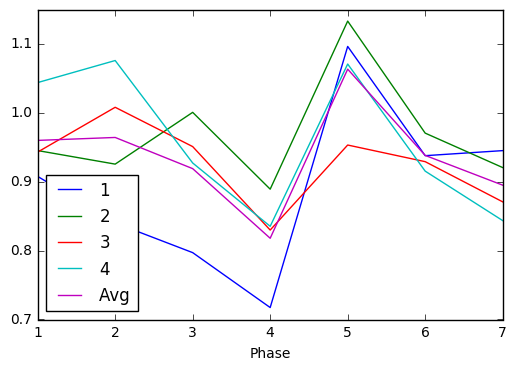

In [47]:
normWinStayScore.groupby(level = "Phase").apply(np.mean).plot()

## Win-Shift

In [32]:
stratScoreAnimal,stratScoreRand,normWinShiftScore = calcNormStratScores(WinShift,sides,choices)

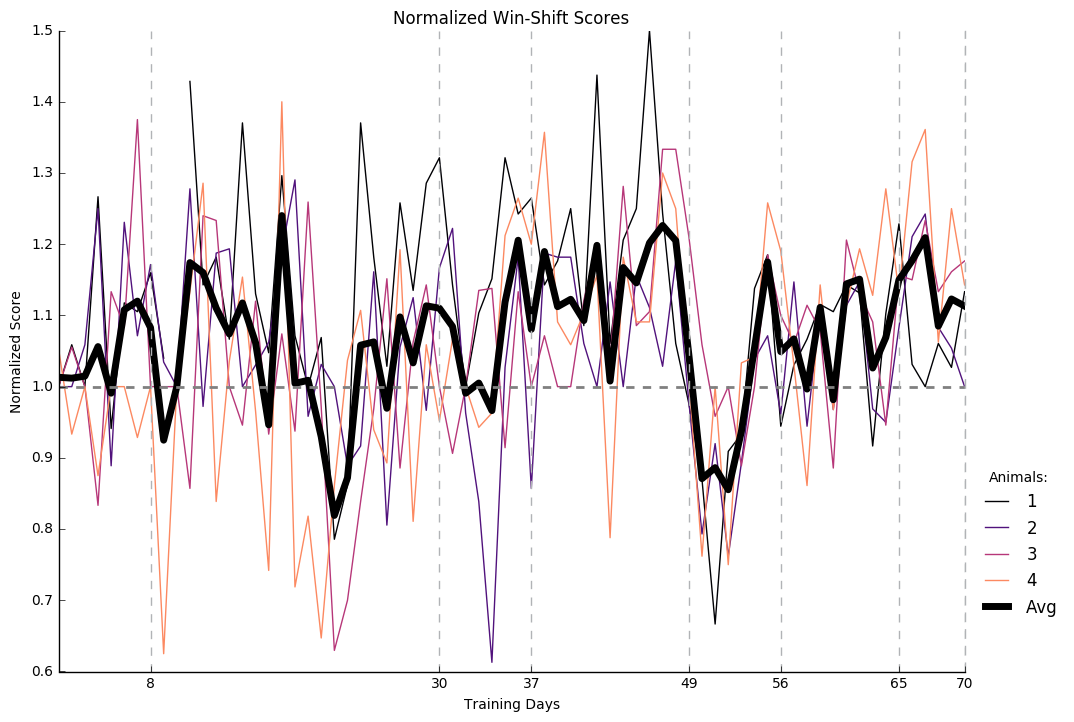

In [33]:
plotIt(normWinShiftScore, "Normalized Win-Shift Scores", ylabel = "Normalized Score", Norm = True )

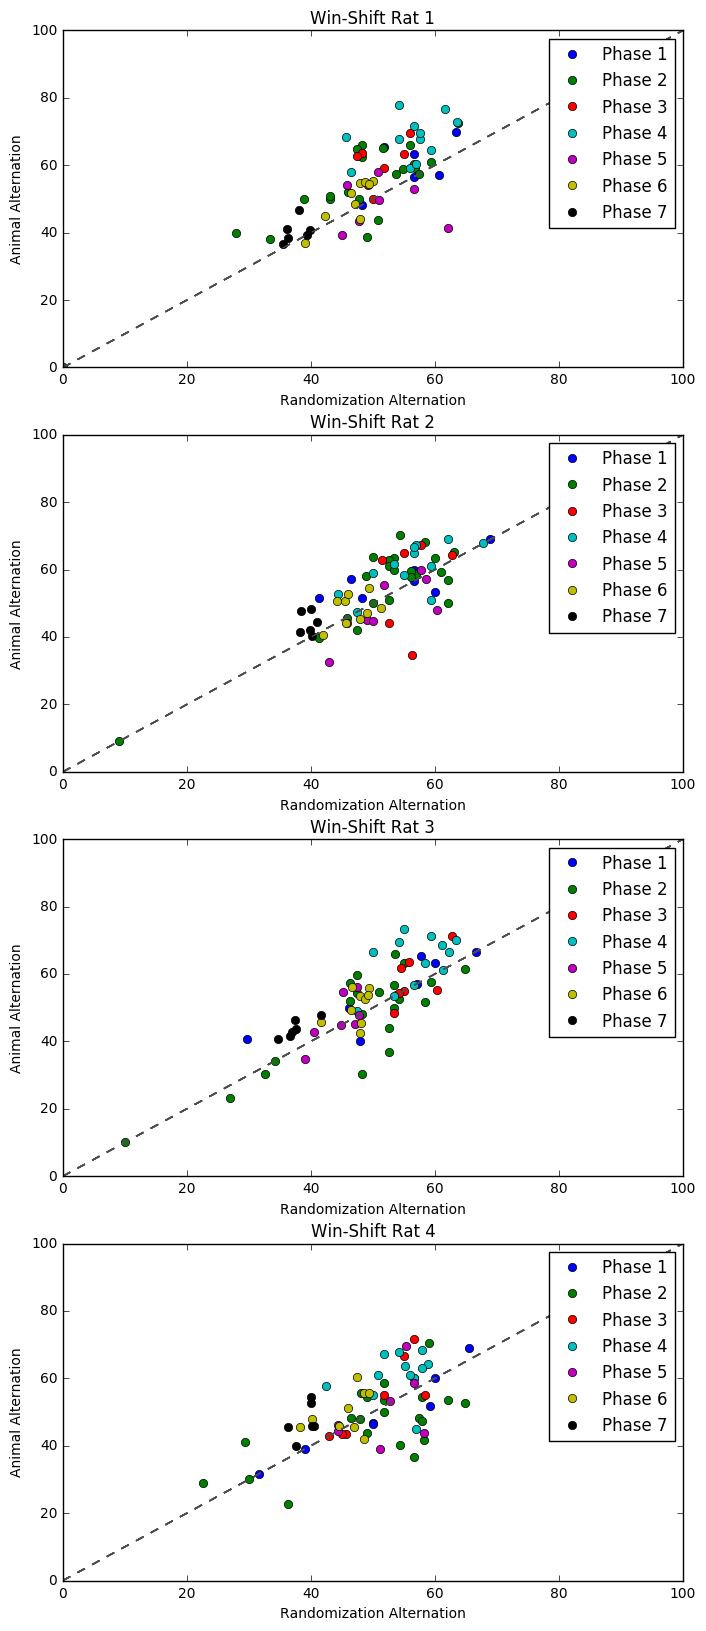

In [34]:
plotNormScoresScatter(stratScoreAnimal,stratScoreRand, "Win-Shift")

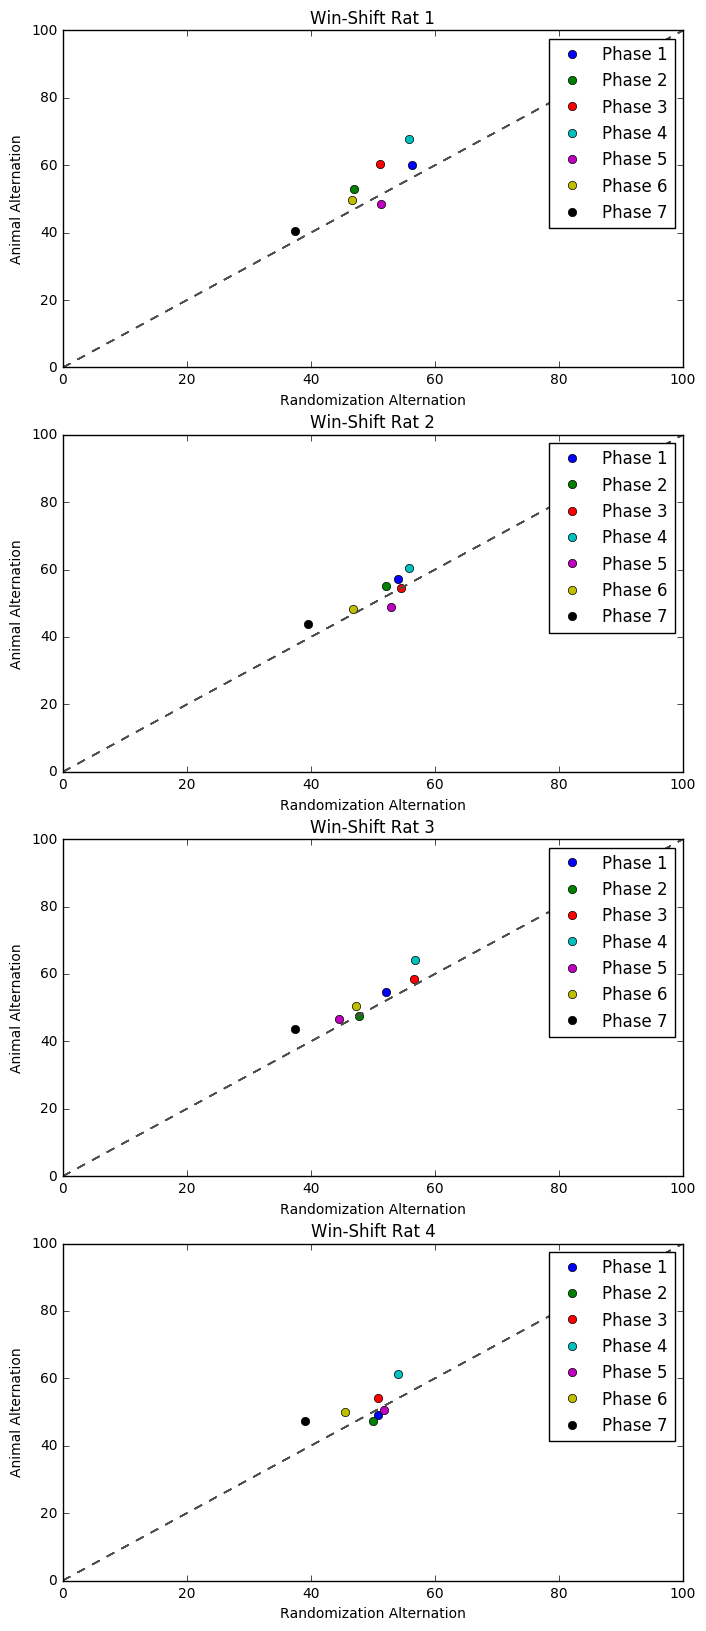

In [35]:
plotNormScoresScatter(stratScoreAnimal,stratScoreRand, "Win-Shift", mean = True)

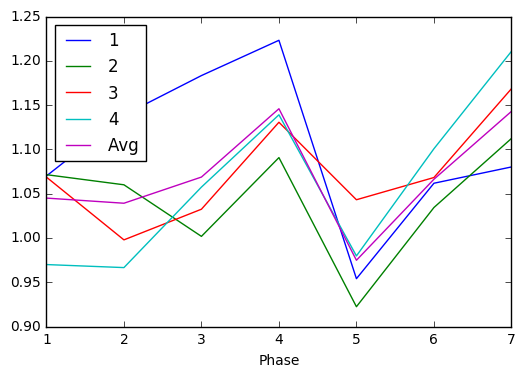

In [45]:
normWinShiftScore.groupby(level = "Phase").apply(np.mean).plot()

In [ ]:
normAltWinShift.plot()

## Alternation

In [36]:
stratScoreAnimal,stratScoreRand,normAltScore = calcNormStratScores(Alt,sides,choices)

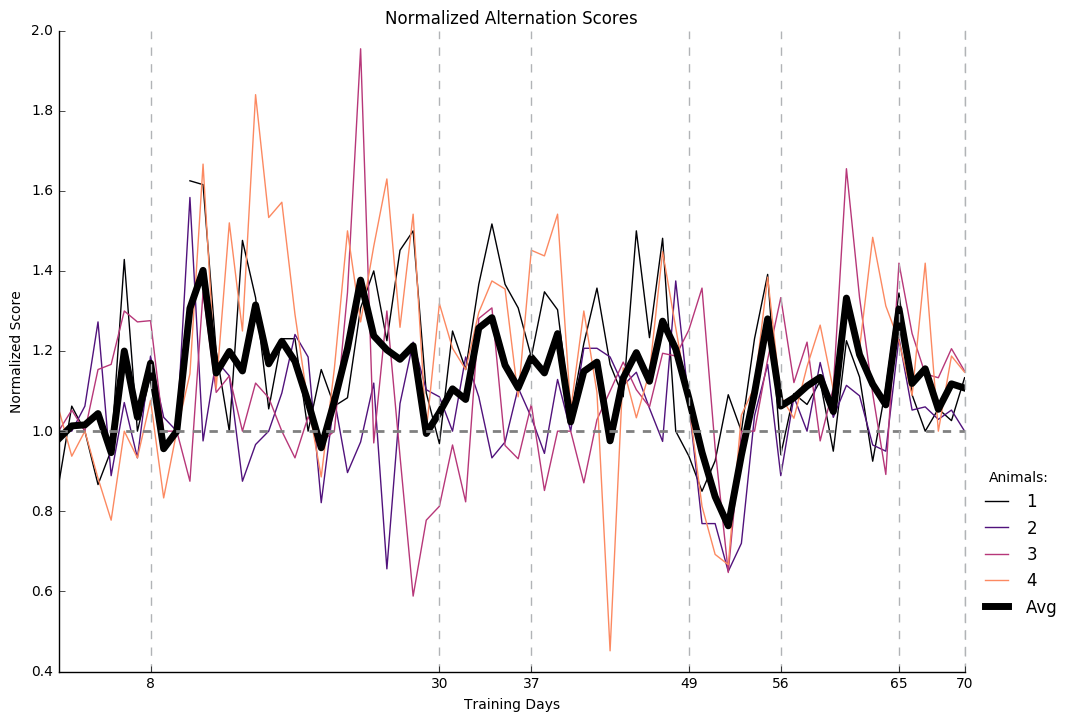

In [37]:
plotIt(normAltScore, "Normalized Alternation Scores", ylabel = "Normalized Score", Norm = True )

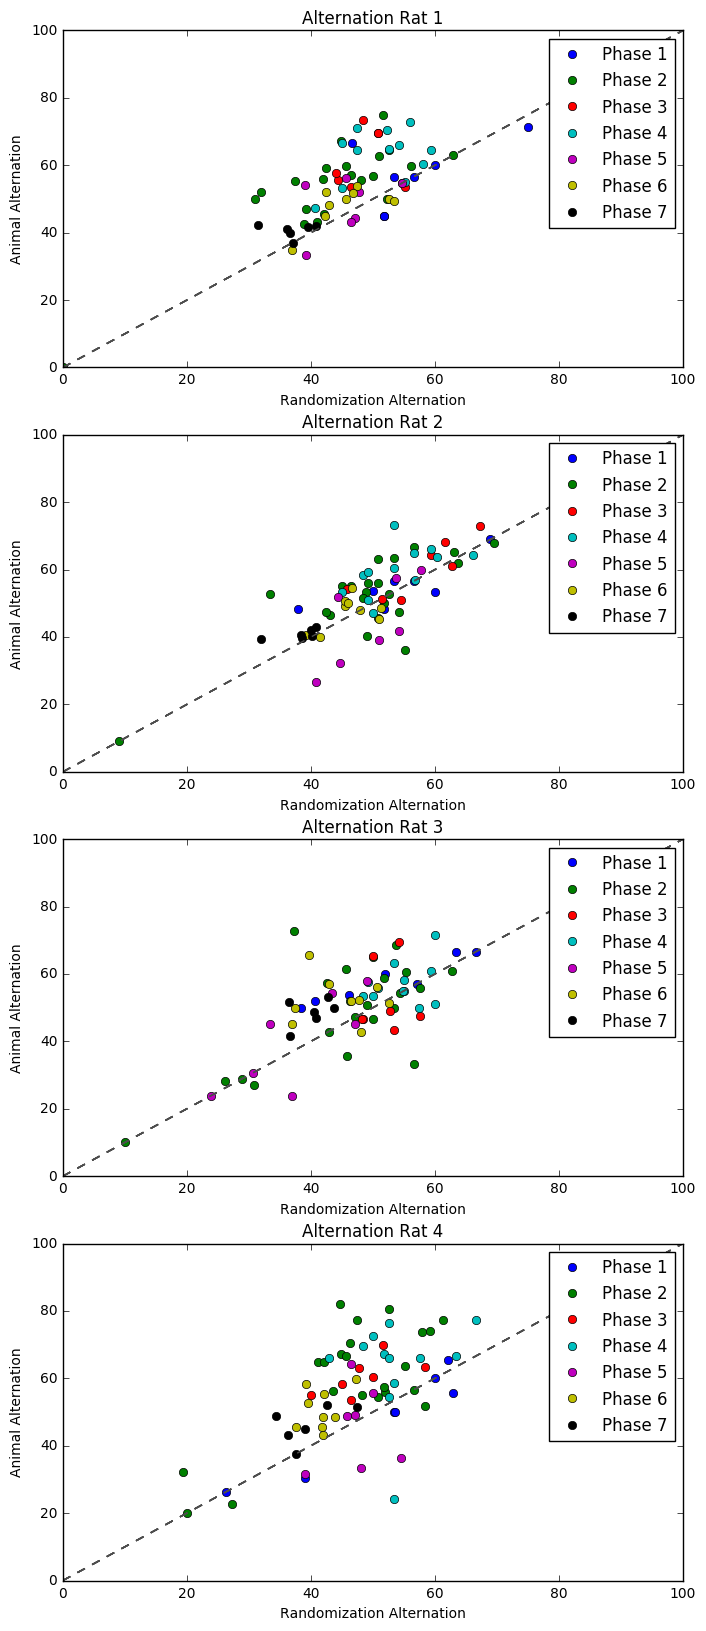

In [38]:
plotNormScoresScatter(stratScoreAnimal,stratScoreRand, "Alternation")

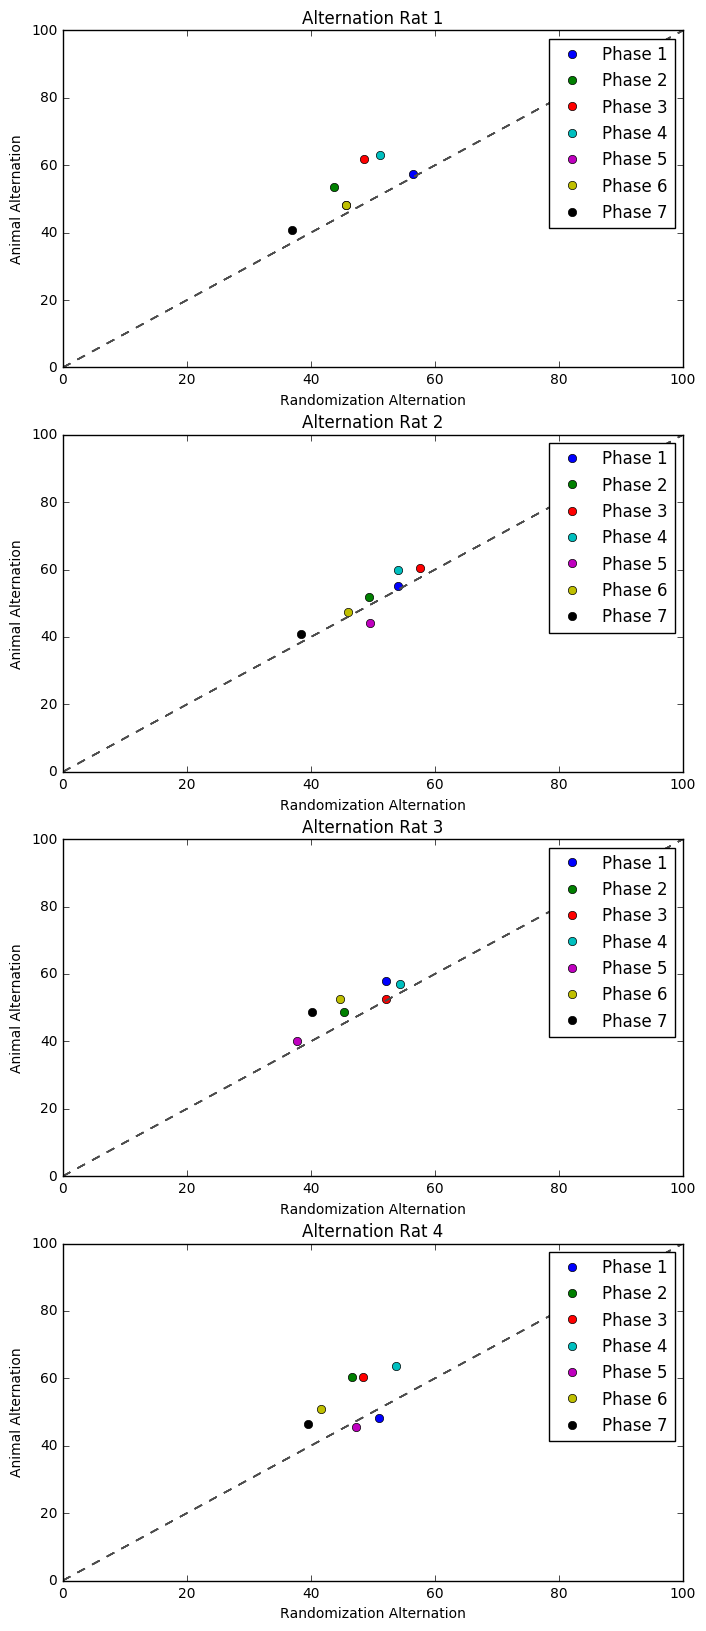

In [39]:
plotNormScoresScatter(stratScoreAnimal,stratScoreRand, "Alternation", mean = True)

In [40]:
normAltAvgs = normAltScore.groupby(level = "Phase").apply(np.mean)

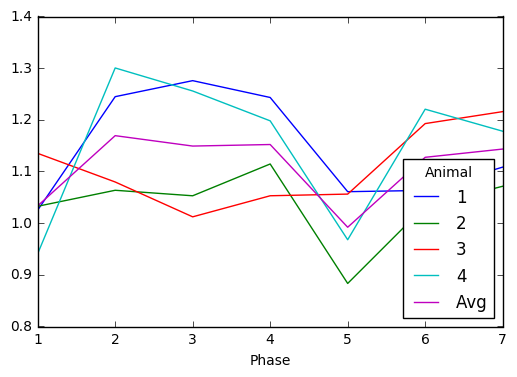

In [41]:
normAltAvgs.plot()